In [1]:
import sys
sys.path.append("..")

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras_object_detection import benchmarks, dataloader
from keras_object_detection.utils import box_utils

In [2]:
shapes_benchmark = benchmarks.ShapesBenchMark(height=448, width=448)
shapes_benchmark.set_label_map()
shapes_benchmark.make_dataset(n_data_samples=256)

print(f"Dataset Length: {len(shapes_benchmark)}")

100%|██████████| 256/256 [00:34<00:00,  7.48it/s]

Dataset Length: 256


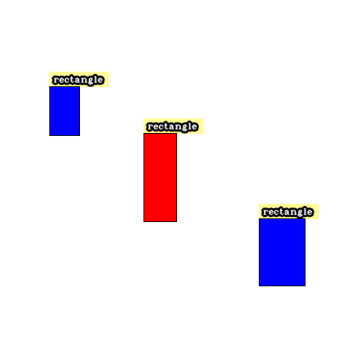

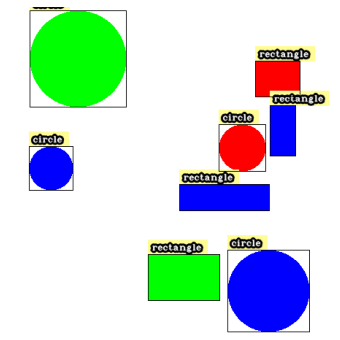

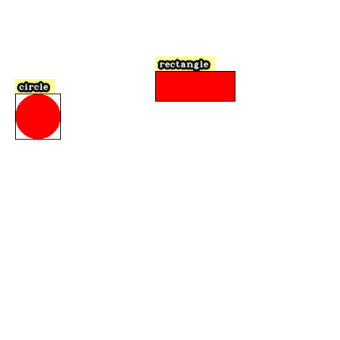

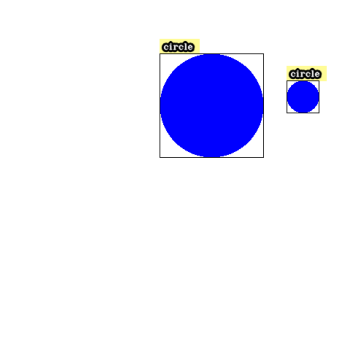

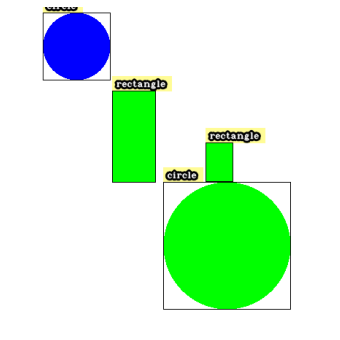

In [3]:
shapes_benchmark.plot_samples()

In [4]:
tfrecord_dir = shapes_benchmark.create_tfrecords()
tfrecord_dir

100%|██████████| 52/52 [00:00<00:00, 4208.95it/s]


'./dataset/shapes/tfrecords'

In [5]:
data_loader = dataloader.YOLOv1DataLoader(
    dataset_path=tfrecord_dir, run_sanity_checks=True
)
train_dataset = data_loader.build_dataset(is_train=False)
train_dataset

tf.Tensor(b'./dataset/shapes/tfrecords/train/shapes-train-0064-0128.tfrec', shape=(), dtype=string) tf.Tensor(b'./dataset/shapes/tfrecords/val/shapes-val-0000-0064.tfrec', shape=(), dtype=string)


<ParallelMapDataset shapes: ((None, None, 3), (None, 4), (None,)), types: (tf.float32, tf.float32, tf.int64)>

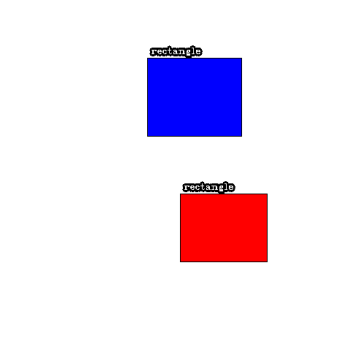

In [6]:
for image, boxes, class_ids in train_dataset.take(1):
    classes = [
        {
            v: k for k, v in shapes_benchmark.label_map.items()
        }[int(x)] for x in class_ids.numpy()
    ]
    plot = box_utils.draw_boxes(
        image.numpy(), boxes.numpy(), classes
    )
    plt.figure(figsize=(8, 6))
    plt.imshow(plot)
    plt.axis('off')